# Data Story Regarding Hospital Satification

What can hospitals do to increase patient satisfaction?  

This is a question with serious financial implictions to the success of every hospital in America.

The HCAHPS (the Hospital Consumer Assessment of Healthcare Providers and Systems) is a patient satisfaction 
survey required by CMS (the Centers for Medicare and Medicaid Services) for all hospitals in the United States.

This paper will explore the survey data of the HCAHPS to identify actionable trends for hostpials to focus upon.
The HCAHPS includes a question regarding whether patients would reccommend the hospital to family or friends.
The results include a positive 'YES' percentage, a nagative 'NO' percentage and a neutral percentage.
Using survey data from this field, this paper will answer the following questions:
    
    1. What are the differnce in standard deviation and variance with regards to 'YES' and 'NO' answers
    on whether a patient would recommend the hostpital to a friend.
    
    2. Does a scatter plot of those answering "YES" vs "NO" on the recommend hospital question reveal anything?
    
    3. What are next steps of analysis that could yield actionable data for hospitals?

In [239]:
import pandas as pd
df = pd.read_csv('Patient_survey__HCAHPS__-_Hospital.csv')
import matplotlib.pyplot as plt
import numpy as np

In [240]:
df.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent',
       'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Value',
       'Number of Completed Surveys', 'Number of Completed Surveys Footnote',
       'Survey Response Rate Percent', 'Survey Response Rate Percent Footnote',
       'Measure Start Date', 'Measure End Date', 'Location'],
      dtype='object')

In [241]:
# Data is stored as a series of objects.  
# Column names include blank spaces.  Will replace blank spaces in colun names with a '_'

df.columns = df.columns.str.replace('\s+', '_')

In [242]:
# Creating new dataframe 'yes_rec_df' which corresponds solely to the question of whether patients
# would recommend hospital to friends and family.  The 'HCAHPS_Answer_Percent' columns within this 
# dataframe represent the percentage of respondents who said they would recommend hospital.

yes_rec_df = df[df.HCAHPS_Question == 'Patients who reported YES, they would definitely recommend the hospital']


In [243]:
# Many of the HCAHPS_Aswer_Percent fields contain a a value 'Not Available'.  Those entries
# are removed since they are not relevant and cannot be plotted.

yes_rec_df = yes_rec_df[yes_rec_df.HCAHPS_Answer_Percent != 'Not Available']
len(yes_rec_df)

# len shows we have 4103 records in our list of hospitals with valid percentages to recommend quetion.

4103

In [244]:
# In order to plot histogram of how how hopitals perforomed on recommend question, data 
# is isoltated on percentage variable and converted from object to integer.


rec_percent = yes_rec_df.HCAHPS_Answer_Percent
yes_int = rec_percent.astype(int)


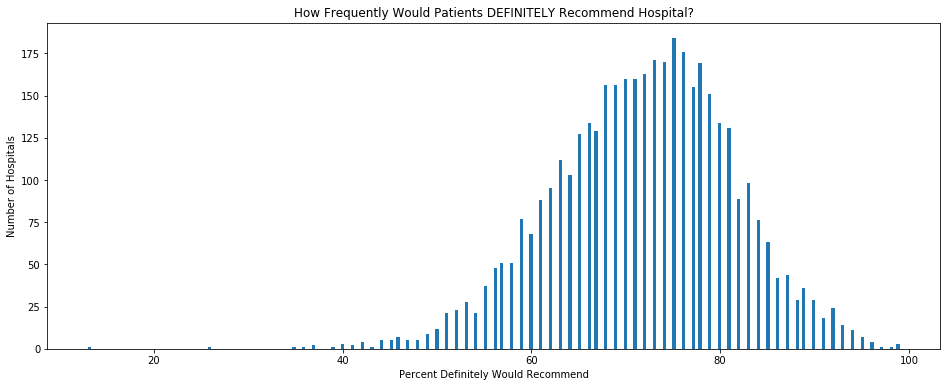

In [245]:
# Histogram showing spread of how likely pateitns are to recommend hospital to family and friends

plt.figure(figsize=(16, 6))
plt.hist(yes_int, bins = 250)
plt.xlabel('Percent Definitely Would Recommend')
plt.ylabel('Number of Hospitals')
plt.title('How Frequently Would Patients DEFINITELY Recommend Hospital?')
plt.show()

In [246]:
# Check mean and standard deviation of YES recommendations

print('Mean - ', yes_int.mean())
print('Standard Deviation - ', yes_int.std())
print('Variance - ', yes_int.var())

Mean -  71.8125761637826
Standard Deviation -  9.549083739335211
Variance -  91.18500026083613


In [247]:
# Doing same thing with 'would not recommend' answers

no_rec_df = df[df.HCAHPS_Question == 'Patients who reported NO, they would probably not or definitely not recommend the hospital']
no_rec_df = no_rec_df[no_rec_df.HCAHPS_Answer_Percent != 'Not Available']
len(no_rec_df)Available']

# 4103 hospitals contain 'no' percentage data, same as with 'yes' data from above

SyntaxError: invalid syntax (<ipython-input-247-52b610ab06d6>, line 5)

In [ ]:
# Generate histogram showing percent of patients who would not recommend hospital

no_rec_percent = no_rec_df.HCAHPS_Answer_Percent
no_int = no_rec_percent.astype(int)

plt.figure(figsize=(16, 6))
plt.hist(no_int, bins = 30)
plt.xlabel('Percent Would Not Recommend')
plt.ylabel('Number of Hospitals')
plt.title('How Frequently Would Patients NOT Recommend Hospital?')
plt.show()

In [ ]:
# Check mean and standard deviation of NO recommendations

print('Mean - ', no_int.mean())
print('Standard Deviation - ', no_int.std())
print('Variance - ', no_int.var())

In [248]:
# Hospitals that receive > 10% of patient responses who would not recommend hospital are receiving more than
# twice as many of these nagative ratings as average, and are outside the standard deviation.

# It will be interesting to see correalations between those hospitals receiving unusally high NO
# recommendations and other survey data to determine if certain factors are more likey than others to 
# result in hospitals receiving low recommendation rankings.


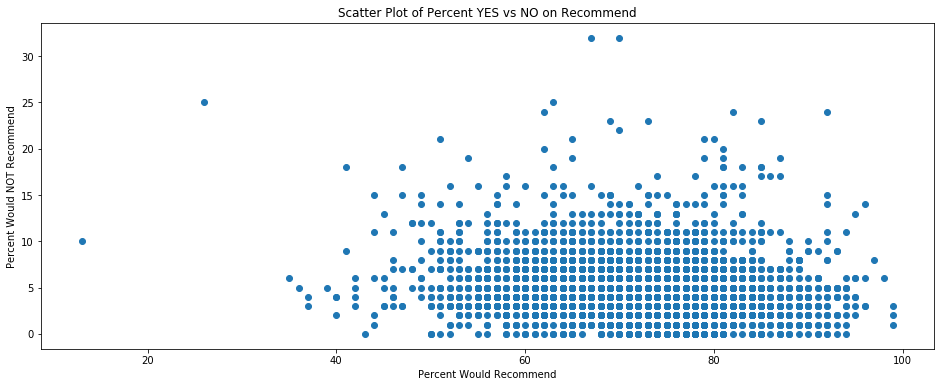

In [249]:
# We will explore scatter plot of 'YES' vs 'NO' answers to determine anomolies in data

plt.figure(figsize=(16, 6))
plt.scatter(x = yes_int, y = no_int)
plt.xlabel('Percent Would Recommend')
plt.ylabel('Percent Would NOT Recommend')
plt.title('Scatter Plot of Percent YES vs NO on Recommend')
plt.show()

In [250]:
Conclusions:
    
Overall, the mean, variance and stadard deviation are higher in the 'YES' sample than in the 'NO' sample.
While the 'NO' sample is clustered in a smaller range overall, it appears that the outliers in the 'NO'
sample form a longer tail and it may be more useful for future analysis.

The scatter plot suggests that there is limited correlation between hospitals receiving 'YES' answers and 
hospitals receiving 'NO' answers with regards to likelyhood of recommendations.  Hospitals receiving an unsually
high number of 'NO' recommendations appear pretty evenly distributed among how likely they are to receive 'YES'
recommendations.

Next Steps:
    
Next we will analyze other factors of the survey and correlate them to 'YES/NO' recommendations.

SyntaxError: invalid syntax (<ipython-input-250-39b603e1184b>, line 1)

In [251]:
# Staff Resposiveness overall (linear mean score) analysis

staff_response_linear = df[df.HCAHPS_Question == 'Staff responsiveness - linear mean score']
staff_response_linear = staff_response_linear[staff_response_linear.HCAHPS_Linear_Mean_Value != 'Not Available']
staff_response_linear = staff_response_linear[staff_response_linear.HCAHPS_Linear_Mean_Value != 'Not Applicable']
len(staff_response_linear)

3505

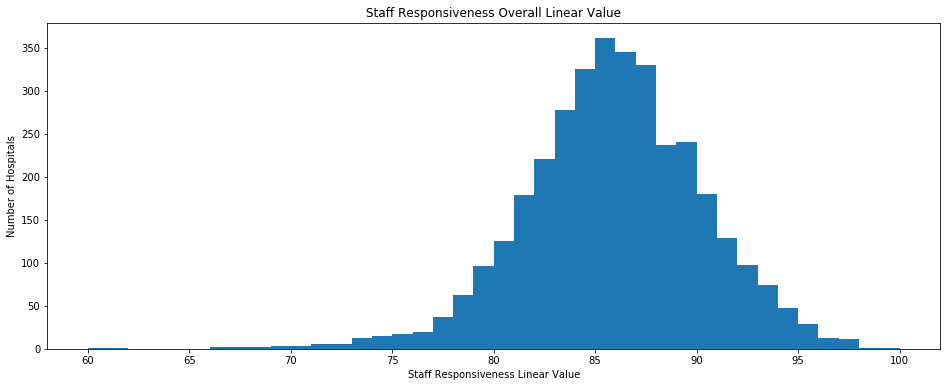

In [252]:
staff_response_linear_percent = staff_response_linear.HCAHPS_Linear_Mean_Value
srlp_int = staff_response_linear_percent.astype(int)

plt.figure(figsize=(16, 6))
plt.hist(srlp_int, bins = 40)
plt.xlabel('Staff Responsiveness Linear Value')
plt.ylabel('Number of Hospitals')
plt.title('Staff Responsiveness Overall Linear Value')
plt.show()

In [ ]:
# ... To be continued ..
    